<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>


# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

**Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.**

*rougher* — флотация

*primary_cleaner* — первичная очистка

*secondary_cleaner* — вторичная очистка

*final* — финальные характеристики

Данные находятся в трёх файлах:

**gold_recovery_train_new.csv** — обучающая выборка;

**gold_recovery_test_new.csv** — тестовая выборка;

**gold_recovery_full_new.csv** — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.


## Подготовка данных

Импортируем необходимые нам библиотеки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Запишем разбиеие на обучающую, тестовую и исходную выборки

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv') #  обучающая выборка
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv') # тестовая выборка
gold_recovery_full= pd.read_csv('/datasets/gold_recovery_train_new.csv') # исходная  выборка

Получим основную информацию о датасетах

In [3]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [4]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [5]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [6]:
gold_recovery_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


Проверим, правильно ли рассчитана эффективность обогащения для признака rougher.output.recovery на обучающей выборке.
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.
rougher.output.recovery - флотация, параметры продукта, переработка

In [7]:
gold_recovery_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
F = gold_recovery_train['rougher.input.feed_au']
C = gold_recovery_train['rougher.output.concentrate_au']
T = gold_recovery_train['rougher.output.tail_au']
recovery = C*(F - T)/(F*(C-T)) * 100
print(recovery)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64


Посчитаем значением метрики *MAE*

In [9]:
print(mean_absolute_error(gold_recovery_train['rougher.output.recovery'],recovery))

9.682896147825551e-15


**Вывод** : Для большого количества данных (14+ тысяч строк) это достаточно маленькое значение, значит мы посчитали эффективность обогащения правильно.

* data  - дата и время получения информации


* final.output.concentrate_ag                -           финальный концентрат Argentum-Серебро
* final.output.concentrate_pb                -           финальный концентрат Plumbum-Свинец
* final.output.concentrate_sol               -           финальный концентрат Solids-Твердых веществ
* final.output.concentrate_au                -           финальный концентрат Aurum-Золото


* final.output.recovery                      -           эффективность обогащения финального концентрата
* final.output.tail_ag                       -           отвальные хвосты Серебра на финальном этапе
* final.output.tail_pb                       -           отвальные хвосты Свинца на финальном этапе
* final.output.tail_sol                      -           отвальные хвосты Твердых веществ на финальном этапе
* final.output.tail_au                       -           отвальные хвосты Золота на финальном этапе


* primary_cleaner.input.sulfate              -           первичная очистка. объем реагента Сульфата
* primary_cleaner.input.depressant           -           первичная очистка. объем реагента-депрессанта 
* primary_cleaner.input.feed_size            -           первичная очистка. размер гранул сырья 
* primary_cleaner.input.xanthate             -           первичная очистка. объем ксантогената 


* primary_cleaner.output.concentrate_ag      -           первичная очистка. концентрат Серебра на выходе
* primary_cleaner.output.concentrate_pb      -           первичная очистка. концентрат Свинца на выходе
* primary_cleaner.output.concentrate_sol     -           первичная очистка. концентрат Твердых веществ на выходе
* primary_cleaner.output.concentrate_au      -           первичная очистка. концентрат Золота на выходе


* primary_cleaner.output.tail_ag             -           первичная очистка. отвальные хвосты Серебра на выходе
* primary_cleaner.output.tail_pb             -           первичная очистка. отвальные хвосты Свинца на выходе
* primary_cleaner.output.tail_sol            -           первичная очистка. отвальные хвосты Твердых веществ на выходе
* primary_cleaner.output.tail_au             -           первичная очистка. отвальные хвосты Золота на выходе


* primary_cleaner.state.floatbank8_a_air     -           первичная очистка. объем воздуха в 8_a флотационной установке 
* primary_cleaner.state.floatbank8_a_level   -           первичная очистка. уровень жидкости в 8_a флотационной установке               
* primary_cleaner.state.floatbank8_b_air     -           первичная очистка. объем воздуха в 8_b флотационной установке 
* primary_cleaner.state.floatbank8_b_level   -           **
* primary_cleaner.state.floatbank8_c_air     -           **
* primary_cleaner.state.floatbank8_c_level   -           **
* primary_cleaner.state.floatbank8_d_air     -           **
* primary_cleaner.state.floatbank8_d_level   -           **


* rougher.calculation.sulfate_to_au_concentrate         - флотация. расчетные хар-ки.концентрация реагента сульфата к золоту
* rougher.calculation.floatbank10_sulfate_to_au_feed    - флотация. расчетные хар-ки.подача реагента сульфата к золоту в 10 флотационной установке
* rougher.calculation.floatbank11_sulfate_to_au_feed    - флотация. расчетные хар-ки.подача реагента сульфата к золоту в 11 флотационной установке
* rougher.calculation.au_pb_ratio                       - флотация. расчетные хар-ки.соотношение золота к свинцу


* rougher.input.feed_ag            - флотация. подача серебра                     
* rougher.input.feed_pb            - флотация. подача свинца                   
* rougher.input.feed_rate          - флотация. скорость подачи                     
* rougher.input.feed_size          - флотация. размер гранул сырья                    
* rougher.input.feed_sol           - флотация. подача твердых веществ                     
* rougher.input.feed_au            - флотация. подача золота  


* rougher.input.floatbank10_sulfate        - флотация. подача реагента сульфата в 10 флотационную установку             
* rougher.input.floatbank10_xanthate       - флотация. подача реагента ксантогената в 10 флотационную установку        
* rougher.input.floatbank11_sulfate        - флотация. подача реагента сульфата в 11 флотационную установку             
* rougher.input.floatbank11_xanthate       - флотация. подача реагента ксантогената в 11 флотационную установку   


* rougher.output.concentrate_ag            - флотация. исходящая концетрация серебра               
* rougher.output.concentrate_pb               ***   свинца            
* rougher.output.concentrate_sol              ***   твердых веществ        
* rougher.output.concentrate_au               ***   золота


* rougher.output.recovery                  - эффективность обогащения чернового концентрата             
* rougher.output.tail_ag                   - флотация. отвальные хвосты серебра              
* rougher.output.tail_pb                   - флотация. отвальные хвосты свинца                
* rougher.output.tail_sol                  - флотация. отвальные хвосты твердых веществ                  
* rougher.output.tail_au                   - флотация. отвальные хвосты золота  


* rougher.state.floatbank10_a_air          - флотация. объем вохдуха в 10_a флотационной установке             
* rougher.state.floatbank10_a_level        - флотация. уровень жидкости в 10_a флотационной установке              
* rougher.state.floatbank10_b_air                       
* rougher.state.floatbank10_b_level                     
* rougher.state.floatbank10_c_air                       
* rougher.state.floatbank10_c_level                     
* rougher.state.floatbank10_d_air                       
* rougher.state.floatbank10_d_level                     
* rougher.state.floatbank10_e_air                       
* rougher.state.floatbank10_e_level                    
* rougher.state.floatbank10_f_air                       
* rougher.state.floatbank10_f_level                     


* secondary_cleaner.output.tail_ag        - вторичная очистка. отвальные хвосты серебра             
* secondary_cleaner.output.tail_pb        - вторичная очистка. отвальные хвосты свинца             
* secondary_cleaner.output.tail_sol       - вторичная очистка. отвальные хвосты твердых веществ              
* secondary_cleaner.output.tail_au        - вторичная очистка. отвальные хвосты золота


* secondary_cleaner.state.floatbank2_a_air        - вторичная очистка. объем воздуха в 2_a флотационной установке 
* secondary_cleaner.state.floatbank2_a_level            
* secondary_cleaner.state.floatbank2_b_air              
* secondary_cleaner.state.floatbank2_b_level            
* secondary_cleaner.state.floatbank3_a_air             
* secondary_cleaner.state.floatbank3_a_level            
* secondary_cleaner.state.floatbank3_b_air              
* secondary_cleaner.state.floatbank3_b_level            
* secondary_cleaner.state.floatbank4_a_air              
* secondary_cleaner.state.floatbank4_a_level            
* secondary_cleaner.state.floatbank4_b_air              
* secondary_cleaner.state.floatbank4_b_level            
* secondary_cleaner.state.floatbank5_a_air              
* secondary_cleaner.state.floatbank5_a_level            
* secondary_cleaner.state.floatbank5_b_air              
* secondary_cleaner.state.floatbank5_b_level            
* secondary_cleaner.state.floatbank6_a_air              
* secondary_cleaner.state.floatbank6_a_level  

 В тестовой выборке отсутствуют некоторые признаки (например **secondary_cleaner.output.tail_ag**,   **secondary_cleaner.output.tail_pb**,   **secondary_cleaner.output.tail_sol**,   **secondary_cleaner.output.tail_au**), которые могут быть в обучающей выборке из-за того, что некоторые параметры замеряются и/или рассчитыыаются значительно позже. Также в тестовом наборе нет целевых признаков.

## Анализ данных

Для анализа зависимостей, как менялась концентрация того или иного металла, построим три таблицы для каждого металла.

In [10]:
Au_final  = gold_recovery_train['final.output.concentrate_au']
Au_primary = gold_recovery_train['primary_cleaner.output.concentrate_au']
Au_rougher = gold_recovery_train['rougher.output.concentrate_au']
#Au = gold_recovery_full['final.output.concentrate_au'

print(Au_final.head(5))
print(Au_primary.head(5))
print(Au_rougher.head(5))


0    42.192020
1    42.701629
2    42.657501
3    42.689819
4    42.774141
Name: final.output.concentrate_au, dtype: float64
0    34.174427
1    34.118526
2    33.969464
3    28.260743
4    33.044932
Name: primary_cleaner.output.concentrate_au, dtype: float64
0    19.793808
1    20.050975
2    19.737170
3    19.320810
4    19.216101
Name: rougher.output.concentrate_au, dtype: float64


In [11]:
Ag_final  = gold_recovery_train['final.output.concentrate_ag']
Ag_primary = gold_recovery_train['primary_cleaner.output.concentrate_ag']
Ag_rougher = gold_recovery_train['rougher.output.concentrate_ag']

print(Ag_final.head(5))
print(Ag_primary.head(5))
print(Ag_rougher.head(5))

0    6.055403
1    6.029369
2    6.055926
3    6.047977
4    6.148599
Name: final.output.concentrate_ag, dtype: float64
0    8.547551
1    8.558743
2    8.603505
3    7.221879
4    9.089428
Name: primary_cleaner.output.concentrate_ag, dtype: float64
0    11.500771
1    11.615865
2    11.695753
3    11.915047
4    12.411054
Name: rougher.output.concentrate_ag, dtype: float64


In [12]:
Pb_final  = gold_recovery_train['final.output.concentrate_pb']
Pb_primary = gold_recovery_train['primary_cleaner.output.concentrate_pb']
Pb_rougher = gold_recovery_train['rougher.output.concentrate_pb']

print(Pb_final.head(5))
print(Pb_primary.head(5))
print(Pb_rougher.head(5))

0     9.889648
1     9.968944
2    10.213995
3     9.977019
4    10.142511
Name: final.output.concentrate_pb, dtype: float64
0    10.389648
1    10.497069
2    10.354494
3     8.496563
4     9.986786
Name: primary_cleaner.output.concentrate_pb, dtype: float64
0    7.101074
1    7.278807
2    7.216833
3    7.175616
4    7.240205
Name: rougher.output.concentrate_pb, dtype: float64


Построим по 3 графика для каждого металла

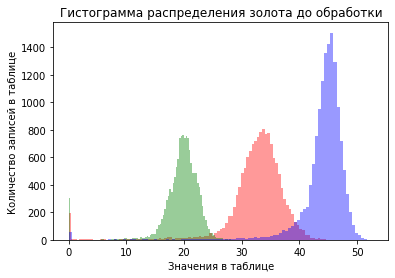

In [13]:
plt.title("Гистограмма распределения золота до обработки")
plt.ylabel('Количество записей в таблице')
sns.distplot(Au_primary ,axlabel  = 'Значения в таблице',color = 'Red',kde = False, bins = 100)
sns.distplot(Au_rougher ,axlabel  = 'Значения в таблице',color = 'Green',kde = False, bins = 100)
sns.distplot(Au_final ,axlabel  = 'Значения в таблице',color = 'Blue',kde = False, bins = 100)

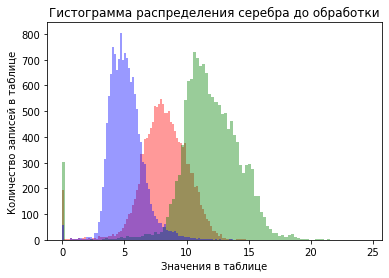

In [14]:
plt.title("Гистограмма распределения серебра до обработки")
plt.ylabel('Количество записей в таблице')
sns.distplot(Ag_primary ,axlabel  = 'Значения в таблице',color = 'Red',kde = False, bins = 100)
sns.distplot(Ag_rougher ,axlabel  = 'Значения в таблице',color = 'Green',kde = False, bins = 100)
sns.distplot(Ag_final ,axlabel  = 'Значения в таблице',color = 'Blue',kde = False, bins = 100)

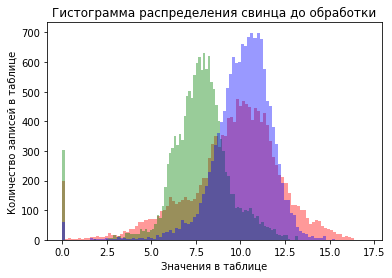

In [15]:
plt.title("Гистограмма распределения свинца до обработки")
plt.ylabel('Количество записей в таблице')
sns.distplot(Pb_primary ,axlabel  = 'Значения в таблице',color = 'Red',kde = False, bins = 100)
sns.distplot(Pb_rougher ,axlabel  = 'Значения в таблице',color = 'Green',kde = False, bins = 100)
sns.distplot(Pb_final ,axlabel  = 'Значения в таблице',color = 'Blue',kde = False, bins = 100)

**Вывод** : У свинца набор данных менее инертный, чем у остальных металлов. Распределения меняются достаточно слабо. Значения у золота меняются сильнее остальных металлов.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

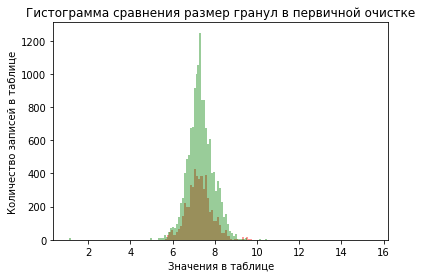

In [16]:
primary_feed_test = gold_recovery_test['primary_cleaner.input.feed_size']
rougher_feed_test = gold_recovery_test['rougher.input.feed_size']
primary_feed_train = gold_recovery_train['primary_cleaner.input.feed_size']
rougher_feed_train = gold_recovery_train['rougher.input.feed_size']


plt.title("Гистограмма сравнения размер гранул в первичной очистке")
plt.ylabel('Количество записей в таблице')
sns.distplot(primary_feed_test ,axlabel  = 'Значения в таблице',color = 'Red',kde = False, bins = 100)
sns.distplot(primary_feed_train, axlabel  = 'Значения в таблице',color = 'Green',kde = False, bins = 100)

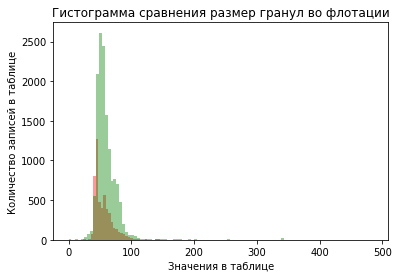

In [17]:
plt.title("Гистограмма сравнения размер гранул во флотации")
plt.ylabel('Количество записей в таблице')
sns.distplot(rougher_feed_test ,axlabel  = 'Значения в таблице',color = 'Red',kde = False, bins = 100)
sns.distplot(rougher_feed_train, axlabel  = 'Значения в таблице',color = 'Green',kde = False, bins = 100)

**Вывод по обоим графикам** : значения на обоих графиках в обучающей выборке распределены с меньшей плотностью и б*о*льшей частотой. Больше повторяющихся значений.

### Исследуем суммарную концентрацию всех веществ на разных стадиях

In [18]:
Total_rougher_metalls = gold_recovery_full['rougher.output.concentrate_au']+gold_recovery_full['rougher.output.concentrate_ag']+gold_recovery_full['rougher.output.concentrate_pb']
Total_primary_metalls = gold_recovery_full['primary_cleaner.output.concentrate_au']+gold_recovery_full['primary_cleaner.output.concentrate_ag']+gold_recovery_full['primary_cleaner.output.concentrate_pb']
Total_final_metalls = gold_recovery_full['final.output.concentrate_au']+gold_recovery_full['final.output.concentrate_ag']+gold_recovery_full['final.output.concentrate_pb']

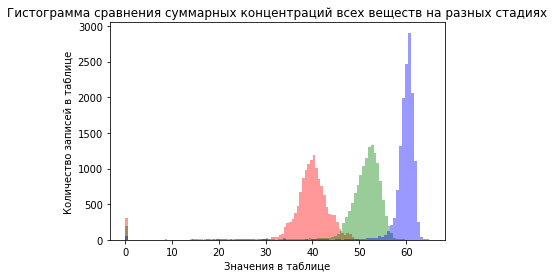

In [19]:
plt.title("Гистограмма cравнения суммарных концентраций всех веществ на разных стадиях")
plt.ylabel('Количество записей в таблице')
sns.distplot(Total_rougher_metalls ,axlabel  = 'Значения в таблице',color = 'Red',kde = False, bins = 100)
sns.distplot(Total_primary_metalls, axlabel  = 'Значения в таблице',color = 'Green',kde = False, bins = 100)
sns.distplot(Total_final_metalls, axlabel  = 'Значения в таблице',color = 'Blue',kde = False, bins = 100)

**Вывод** : Наименее концентрировано в руде сумма всех необработанных металлов, наиболее сильно распределены металлы после финальной обработки, имея множество высоких значений (в районе 60).

### Исследуем данные на аномалии

Из вышестоящих графиков наблюдаются очевидные аномалии в виде нулевых значений. Удапим их для таблицы - они будут мешать работе модели в будущем.

In [20]:
gold_recovery_train = gold_recovery_train.ffill()

Проверим отсутствие NAN-ов в датасете

In [21]:
gold_recovery_train.isnull().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [22]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant             

## Построение модели

Напишем функцию для вычисления итоговой sMAPE

In [23]:
def smape(target_features, predicted_features):
    return 1/len(target_features) * np.sum(2 * np.abs(predicted_features-target_features) / (np.abs(target_features) + np.abs(predicted_features))*100)

Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. Опишите выводы. Вам пригодятся формулы метрик качества.

Целевых признаков 2 - **final.output.concentrate_au**- эффективность обогащения финального концентрата и **rougher.output.concentrate_au** - эффективность обогащения чернового концентрата.
из обучающей выборки.
Признаки - все остальные столбцы, кроме целевых и "даты".

In [24]:
target_final = gold_recovery_train['final.output.concentrate_au']
features_final = gold_recovery_train.drop(['final.output.concentrate_au','rougher.output.concentrate_au'], axis=1)
features_final = features_final[gold_recovery_test.columns]
features_final =features_final.drop(['date'], axis = 1)
features_train_f, features_valid_f, target_train_f,target_valid_f = train_test_split(features_final,target_final,test_size = 0.25,random_state = 12345)

In [25]:
target_rougher = gold_recovery_train['rougher.output.concentrate_au']
features_rougher = gold_recovery_train.drop(['final.output.concentrate_au','rougher.output.concentrate_au'], axis=1)
features_rougher = features_rougher[gold_recovery_test.columns]
features_rougher = features_rougher.drop(['date'], axis = 1)
features_train_r, features_valid_r, target_train_r,target_valid_r = train_test_split(features_rougher,target_rougher,test_size = 0.25,random_state = 12345)

Так как целевые призраки количественные, то мы решаем задачу регрессии. Рассмотрим три модели - "Дерево Решений", "Линейная Регрессия" и "Случайный Лес".

In [26]:
features_rougher.shape, features_final.shape

((14149, 52), (14149, 52))

Добавим недостающие таргетные столбцы в тестовую выборку.

In [27]:
gold_recovery_test['rougher.output.concentrate_au'] = gold_recovery_full['rougher.output.concentrate_au']
gold_recovery_test['final.output.concentrate_au'] = gold_recovery_full['final.output.concentrate_au']

In [28]:
target_final_test = gold_recovery_test['final.output.concentrate_au']
features_final_test = gold_recovery_test.drop(['final.output.concentrate_au','rougher.output.concentrate_au'], axis=1)
features_final_test =features_final_test.drop(['date'], axis = 1)
features_train_test_f, features_valid_test_f, target_train_test_f,target_valid_test_f = train_test_split(features_final_test,target_final_test,test_size = 0.25,random_state = 12345)

In [29]:
target_rougher_test = gold_recovery_test['rougher.output.concentrate_au']
features_rougher_test = gold_recovery_test.drop(['final.output.concentrate_au','rougher.output.concentrate_au'], axis=1)
features_rougher_test =features_rougher_test.drop(['date'], axis = 1)
features_train_test_r, features_valid_test_r, target_train_test_r,target_valid_test_r = train_test_split(features_rougher_test,target_rougher_test,test_size = 0.25,random_state = 12345)

### Модель "Дерево Решений"

In [30]:
#parametrs = {'depth': range(1,6)}
#grid = GridSearchCV(model,parametrs,scoring = 'f1',cv = 5)
#grid.fit(features_train,target_train)
#print(grid.best_params_)
best_model = 1000
best_result_f = 10000
best_result_r = 10000
best_depth = 0
for depth in range(1, 6):
    model = DecisionTreeRegressor(random_state = 12345,max_depth = depth )
    model.fit(features_train_f,target_train_f) 
    predictions_valid = model.predict(features_valid_f) 
    result_f = smape(target_valid_f,predictions_valid)
    if result_f < best_result_f:
        best_model_f = model
        best_result_f = result_f
        best_depth = depth
    model.fit(features_train_r,target_train_r) 
    predictions_valid = model.predict(features_valid_r) 
    result_r = smape(target_valid_r,predictions_valid)
    if result_r < best_result_r:
        best_model = model
        best_result_r = result_r
        best_depth_r = depth
print("sMAPE-метрика:", best_result_f,";", "Глубина дерева:", best_depth)
print("sMAPE-метрика:", best_result_r,";", "Глубина дерева:", best_depth_r)
print("Итоговая sMAPE-метрика:", result_f*0.25 + best_result_r*0.75)

sMAPE-метрика: 6.084515194113346 ; Глубина дерева: 5
sMAPE-метрика: 12.624989775230343 ; Глубина дерева: 5
Итоговая sMAPE-метрика: 10.989871129951092


### Линейная регрессия

In [31]:
model =  LinearRegression()
model.fit(features_train_f,target_train_f) 
predictions_valid_f = model.predict(features_valid_f)
result_f = smape(target_valid_f,predictions_valid_f)
model.fit(features_train_r,target_train_r) 
predictions_valid_r = model.predict(features_valid_r)
result_r = smape(target_valid_r,predictions_valid_r)
print("Итоговая sMAPE-метрика:", result_f*0.25 + result_r * 0.75)

Итоговая sMAPE-метрика: 10.76106400199324


### Случайный Лес

In [ ]:
df_train_1 = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
df_test_1 = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
df_full_1 = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

df_train_1 = df_train_1.fillna(method='ffill') 
df_test_1 = df_test_1.fillna(method='ffill')

features_1 = df_test_1.columns.values
targets_1 = ['rougher.output.recovery', 'final.output.recovery']

features_train_1 = df_train_1[features_1].reset_index(drop=True)
target_train_1 = df_train_1[targets_1].reset_index(drop=True)
features_test_1 = df_test_1[features_1].reset_index(drop=True)
target_test_1 = df_full_1[targets_1].loc[df_test_1.index].reset_index(drop=True)

In [ ]:
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
best_model_r = None
best_result_r = 10000
best_est_r = 0
best_depth_r = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model =   RandomForestRegressor(random_state=12345,n_estimators=est, max_depth= depth)
        model.fit(features_train_f,target_train_f) 
        predictions_valid_f = model.predict(features_test_1) 
        result_f = smape(target_valid_f,predictions_valid_f)
        if result_f < best_result:
            best_model = model
            best_result = result_f
            best_est = est
            best_depth = depth
        model =   RandomForestRegressor(random_state=12345,n_estimators=est, max_depth= depth)
        model.fit(features_train_r,target_train_r) 
        predictions_valid_r = model.predict(features_test_1) 
        result_r = smape(target_valid_r,predictions_valid_f)
        if result_r < best_result_r:
            best_model_r = model
            best_result_r = result_r
            best_est_r = est
            best_depth_r = depth
              

print("Итоговая sMAPE-метрика:",result_f*0.25 + result_r * 0.75 ,";" ,"Количество деревьев:", best_est, ";","Максимальная глубина:", depth)

**Вывод**: Минимальная итоговая sMAPE-метрика у модели "Случайный Лес", так как чем меньше её значение, тем более близки предсказания модели к целевому признаку. Проверим модель на тестовой выборке

На тестовой выборке модель так же дала хорошие результаты.

Сравним нашу модель с базовой. Для этого, напишем функцию dummy_regressor_rougher средствами библиотеки sklearn, стратегию зададим median

In [32]:
dummy_regressor_rougher = DummyRegressor(strategy="median") 
dummy_regressor_rougher.fit(features_train_r, target_train_r)
dummy_rougher_pred = dummy_regressor_rougher.predict(features_train_test_r)
smape_dummy_rougher_r = smape(target_train_test_r, dummy_rougher_pred)
print(smape_dummy_rougher_r)

dummy_regressor_rougher.fit(features_train_f, target_train_f)
dummy_rougher_pred = dummy_regressor_rougher.predict(features_train_test_f)
smape_dummy_rougher_f = smape(target_train_test_f, dummy_rougher_pred)
print(smape_dummy_rougher_f)

print((smape_dummy_rougher_r)*0.25 + (smape_dummy_rougher_f)*0.75)

10.383528410641423
7.193736170779104
7.991184230744684


Видим, что наша  модель работает лучше базовой

In [33]:
df_train_1 = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
df_test_1 = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
df_full_1 = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

df_train_1 = df_train_1.fillna(method='ffill')
df_test_1 = df_test_1.fillna(method='ffill')

features_1 = df_test_1.columns.values
targets = ['rougher.output.recovery','final.output.recovery']
#targets_2  = []

features_train = df_train_1[features_1].reset_index(drop=True)
target_train = df_train_1[targets].reset_index(drop=True)
#target_train_2 = df_train_1[targets_2].reset_index(drop=True)
features_test_1 = df_test_1[features_1].reset_index(drop=True)
target_test_1 = df_full_1[targets].loc[df_test_1.index].reset_index(drop=True)

In [34]:
predictions_valid_f

array([45.8104855 , 43.46092187, 44.15336341, ..., 44.26014027,
       43.14072661, 45.32854697])

********

In [35]:
train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
test= pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

train = df_train_1.fillna(method='ffill')
test = df_test_1.fillna(method='ffill')

RS=100

In [36]:
def smape(y_true, y_pred):
    error = (y_true - y_pred).abs()
    scale = (y_true.abs() + y_pred.abs()) / 2
    result = (error / scale).mean()
    return result
 

def smape_weighted(y_true, y_pred):
    y_true.reset_index(drop=True, inplace=True)
    y_pred = pd.DataFrame(data=y_pred)
    rougher = smape(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    final = smape(y_true.iloc[:, 1], y_pred.iloc[:, 1])
    return 0.25 * rougher + 0.75 * final


target_cols = ['rougher.output.recovery', 'final.output.recovery']
features_train = train[test.columns].reset_index(drop=True)
target_train = train[target_cols].reset_index(drop=True)


#my_scorer =  make_scorer(smape_weighted, greater_is_better=False)

params = {
        'decision_tree': {
            'model': DecisionTreeRegressor(random_state=RS),
            'params': {
                'max_depth': [5, 6],
                'min_samples_split': [2, 3]
            }  
        },
        'random_forest': {
            'model': RandomForestRegressor(random_state=RS, n_jobs=-1),
            'params': {
                'n_estimators': [90, 100],
                'max_depth': [4, 5]
            }
        },
        'LinearRegression': {
            'model': LinearRegression(n_jobs=-1),
            'params': {
                'normalize':[True, False]
            }
        }
    }
    
#def hypertune(X_train, y_train, model_params):
#
#    scores = []
#
#    for model_name, mp in model_params.items():
#        clf = GridSearchCV(mp['model'], mp['params'], cv=5,
#                            scoring=my_scorer, return_train_score=False)
#        clf.fit(X_train, y_train)
#        scores.append({
#            'model': model_name,
#            'best_score': f'{clf.best_score_:.2f}',
#            'best_params': clf.best_params_
#        })
#
#    scores = pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
#    return scores.sort_values(by='best_score', ascending=False)
#

features_train = train[test.columns].reset_index(drop=True)
target_train = train[['rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)
#result = hypertune(features_train, target_train, params)
#result

#model = LinearRegression(n_jobs=-1)
#model.fit(features_train, target_train)
#y_pred = model.predict(test.head())
#y_true = full.loc[test.head().index, ['rougher.output.recovery', 'final.output.recovery']]
#score = smape_weighted(y_true, y_pred)
#f'Итоговый SMAPE: {score:.2f}'

In [37]:

def smape(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2
    result = (error / scale).mean()
    return result
 

def smape_weighted(y_true, y_pred):
    y_true.reset_index(drop=True, inplace=True)
    y_pred = pd.DataFrame(data=y_pred)
    rougher = smape(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    final = smape(y_true.iloc[:, 1], y_pred.iloc[:, 1])
    return 0.25 * rougher + 0.75 * final

In [38]:
test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882


*********************

In [40]:
best_model = None
best_result = [1,1]
best_est = 0
best_depth = 0
best_model_r = None
best_result_r = [1,1]
best_est_r = 0
best_depth_r = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model =   RandomForestRegressor(random_state=12345,n_estimators=est, max_depth= depth)
        model.fit(features_train,target_train) 
        y_pred = model.predict(test) 
        y_true = full.loc[test.index, ['rougher.output.recovery', 'final.output.recovery']]
        result_f = smape(y_true,y_pred)
#        print(result_f )
        if (result_f[0] < best_result[0])&(result_f[1] < best_result[1]):
            best_model = model
            best_result[0] = result_f[0]
            best_result[1] = result_f[1]
            best_est = est
            best_depth = depth
        score = smape_weighted(y_true, y_pred)           
#        model =   RandomForestRegressor(random_state=12345,n_estimators=est, max_depth= depth)
#        model.fit(features_train,target_train) 
#        predictions_valid_r = model.predict(features_test_1) 
 #       result_r = smape(target_test_1,predictions_valid_r)        
 #       if result_r < best_result_r:
 #           best_model_r = model
 #           best_result_r = result_r
 #           best_est_r = est
 #           best_depth_r = depth
              

print("Итоговый SMAPE:", score, "Количество деревьев:", best_est, ";","Максимальная глубина:", depth)

Итоговый SMAPE: 0.10258917612379576 Количество деревьев: 20 ; Максимальная глубина: 10


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке